In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [5]:
data =pd.read_csv("C:/Users/SAHIL/Downloads/day.csv")

In [6]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
data = data.drop(columns=['instant','dteday','casual','registered'])

In [9]:
data[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


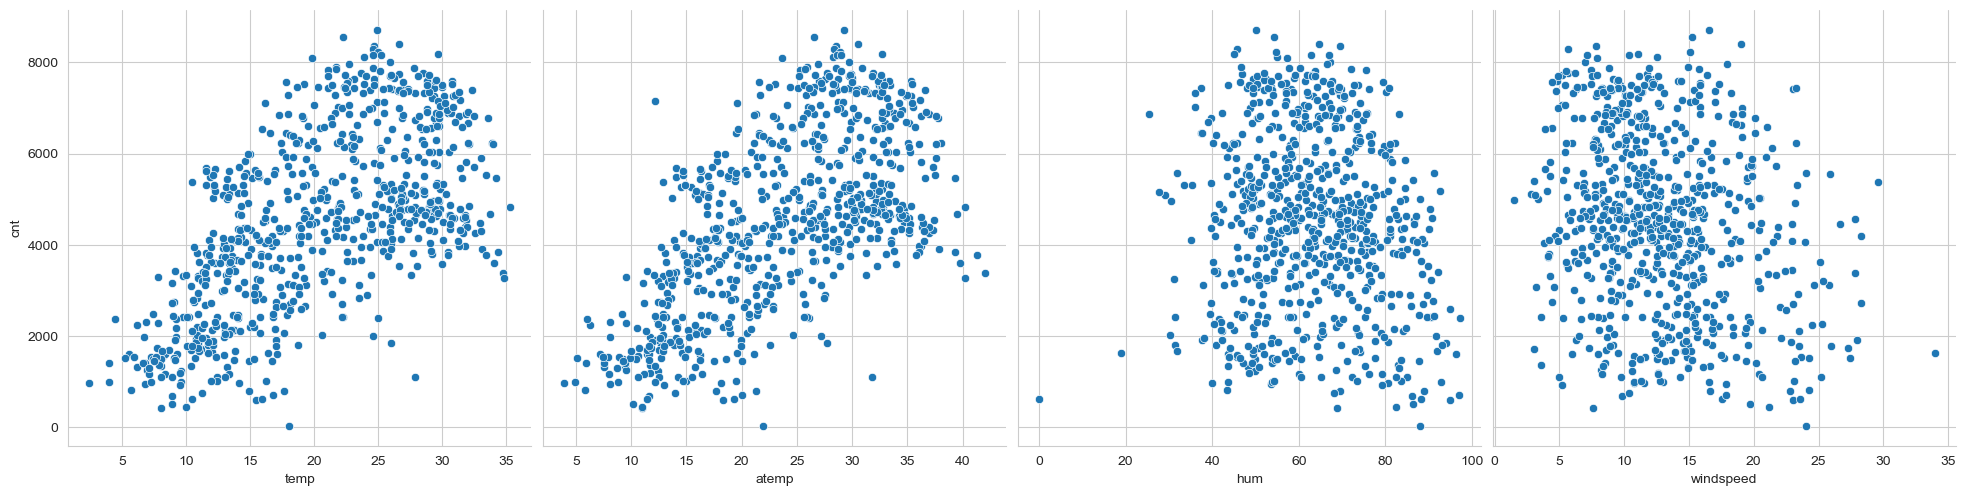

In [10]:
sns.set_style("whitegrid")
sns.pairplot(data=data,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1);

In [11]:
data = data.drop(index = data[(data['temp'] > 15) & (data['temp'] < 20) & (data['cnt'] < 100)].index)
data = data.drop(index = data[(data['temp'] > 25) & (data['temp'] < 30) & (data['cnt'] < 2000)].index)
data = data.drop(index = data[(data['atemp'] > 20) & (data['atemp'] < 25) & (data['cnt'] < 100)].index)
data = data.drop(index = data[(data['atemp'] > 30) & (data['atemp'] < 35) & (data['cnt'] < 2000)].index)
data = data.drop(index = data[(data['hum'] < 20)].index)
data = data.drop(index = data[(data['windspeed'] > 30)].index)

In [12]:
correlation = data[['temp','atemp','hum','windspeed','cnt']].corr()['cnt'].apply(lambda x : round(x,4))
correlation = pd.DataFrame(correlation).sort_values(by='cnt',ascending=False)
correlation.drop(index=['cnt'],inplace=True)
correlation.style.background_gradient(cmap='GnBu')

,cnt
atemp,0.638900
temp,0.635600
hum,-0.107600
windspeed,-0.218100


In [13]:
data[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991726
atemp,0.991726,1.000000


In [14]:
data = data.drop(columns=['atemp'])

In [15]:
data[['temp','hum','windspeed']].corr()

,temp,hum,windspeed
temp,1.000000,0.122673,-0.160295
hum,0.122673,1.000000,-0.247498
windspeed,-0.160295,-0.247498,1.000000


In [16]:
data[['season','weathersit','mnth']] = data[['season','weathersit','mnth']].astype('category')

In [17]:
cat_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in cat_vars : 
    print('Unique values in ',i, data[i].unique())

Unique values in  season [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]
Unique values in  yr [0 1]
Unique values in  mnth [1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]
Unique values in  holiday [0 1]
Unique values in  weekday [6 0 1 2 3 4 5]
Unique values in  workingday [0 1]
Unique values in  weathersit [2, 1, 3]
Categories (3, int64): [1, 2, 3]


In [18]:
season_labels = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}

mnth_labels = {
    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
}

weekday_labels = { 
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}

weathersit_labels = {
    1 : 'clear',
    2 : 'cloudy',
    3 : 'light snow/rain'
}

data['season'] = data['season'].replace(season_labels)
data['mnth'] = data['mnth'].replace(mnth_labels)
data['weekday'] = data['weekday'].replace(weekday_labels)
data['weathersit'] = data['weathersit'].replace(weathersit_labels)

data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,Saturday,0,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,january,0,Sunday,0,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,january,0,Monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,Tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,Wednesday,1,clear,9.305237,43.6957,12.522300,1600


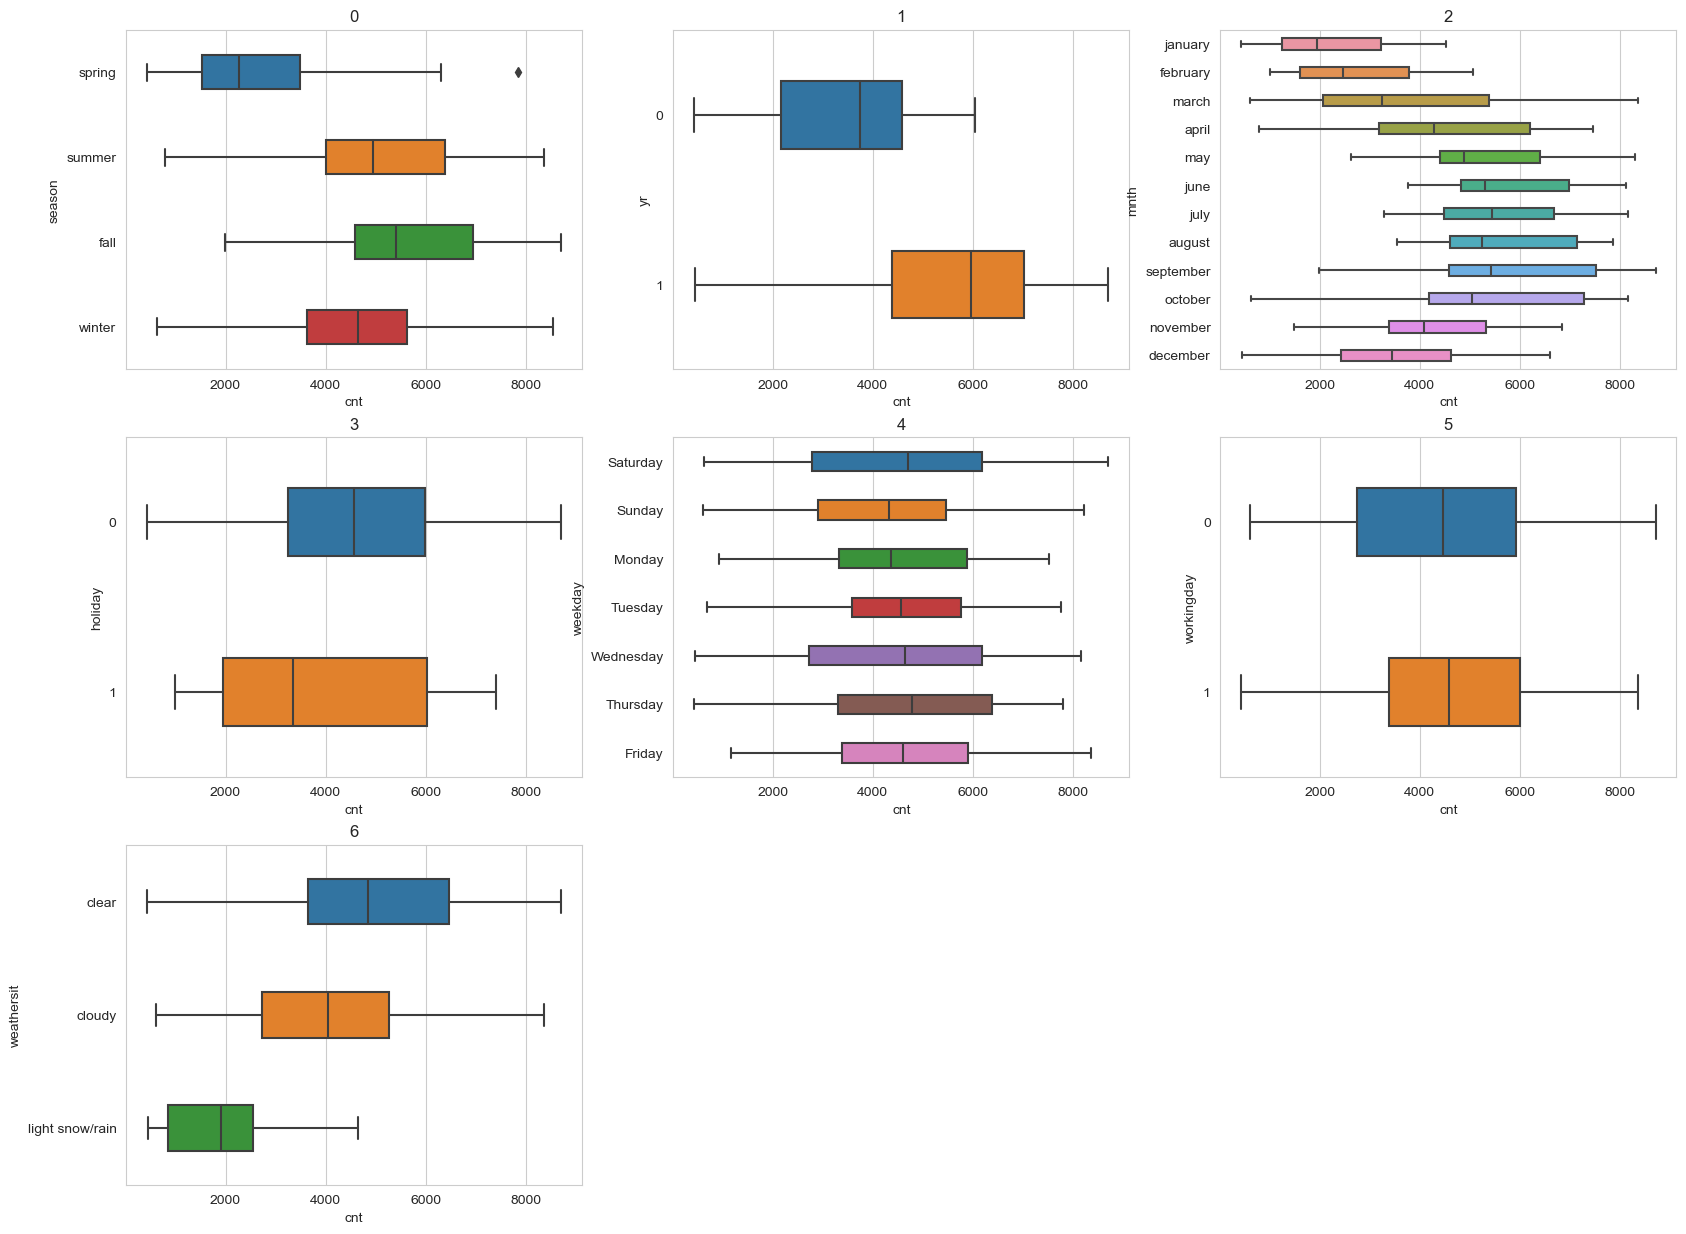

In [19]:
cat_vars = ['season','yr','mnth','holiday','weekday',  'workingday','weathersit']
data1 = data[cat_vars]
data1.loc[:,'cnt'] = data['cnt'].values
data1[['yr','holiday','workingday']] = data1[['yr','holiday','workingday']].astype('category')
plot_dim = [3,3]
fig,axs = plt.subplots(*plot_dim)
fig.set_figheight(15)
fig.set_figwidth(20)
for i in range(plot_dim[0]) :  
    for j in range(plot_dim[1]) :
        axs[i,j].set(title = i*plot_dim[1]+j)
        sns.boxplot(data=data1,x='cnt',y=cat_vars[i*plot_dim[1]+j],width=0.4,ax=axs[i,j])
        if i*plot_dim[1]+j == 6 : 
            break
axs[2,1].set_axis_off()
axs[2,2].set_axis_off()

In [20]:
data = data.drop(index = data[(data['season'] == 'spring') & (data['cnt'] > 7000)].index)

<Axes: >

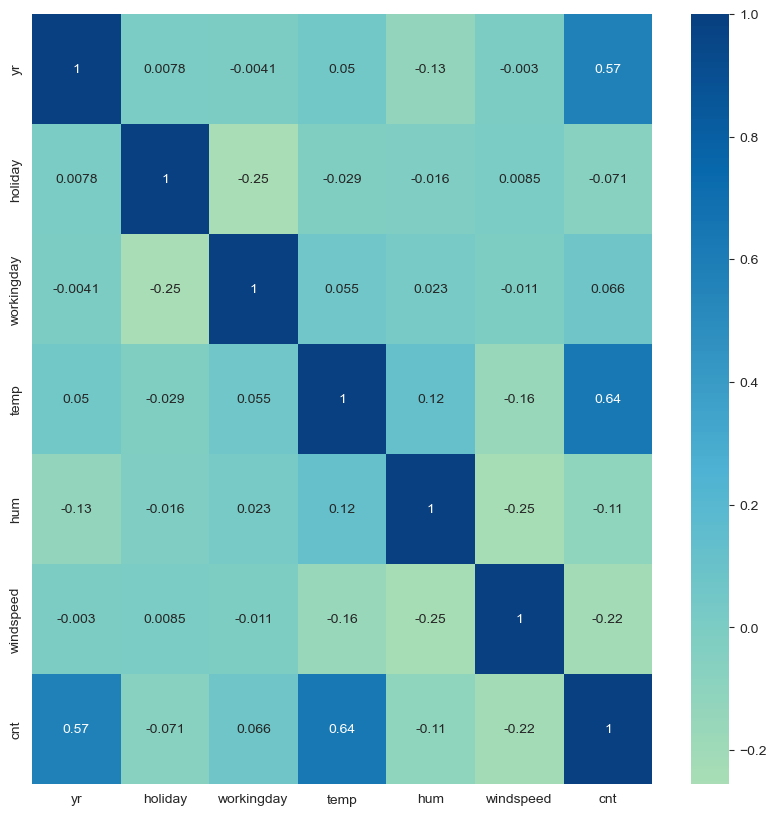

In [21]:
plt.figure(figsize=[10,10])
sns.heatmap(data.corr(),cmap='GnBu',center=0,annot=True)

In [22]:
season_indicators = pd.get_dummies(data['season'],drop_first=True)
mnth_indicators = pd.get_dummies(data['mnth'],drop_first=True)
weekday_indicators = pd.get_dummies(data['weekday'],drop_first=True)
weathersit_indicators = pd.get_dummies(data['weathersit'],drop_first=True)

In [23]:
data = pd.concat([data,season_indicators,mnth_indicators,weekday_indicators,weathersit_indicators],axis=1)
data = data.drop(columns=['season','mnth','weekday','weathersit'])

In [24]:
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,november,december,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'summer', 'fall', 'winter', 'february', 'march', 'april', 'may', 'june',
       'july', 'august', 'september', 'october', 'november', 'december',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'cloudy', 'light snow/rain'],
      dtype='object')

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
dtrain,dtest = train_test_split(data,train_size=0.7,test_size=0.3,random_state=120)

In [28]:
from sklearn.preprocessing import MinMaxScaler 
numerical_scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed']

numerical_scaler.fit(dtrain[num_vars])
dtrain[num_vars] = numerical_scaler.transform(dtrain[num_vars])

In [29]:
y_train = dtrain.pop('cnt')
X_train = dtrain

In [31]:
y_train.head()

231    5191
717    5267
107    3429
595    4549
485    5740
Name: cnt, dtype: int64

In [32]:
y_train.head()

231    5191
717    5267
107    3429
595    4549
485    5740
Name: cnt, dtype: int64

In [33]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'february', 'march', 'april', 'may', 'june', 'july',
       'august', 'september', 'october', 'november', 'december', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'cloudy',
       'light snow/rain'],
      dtype='object')

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [35]:
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
17,1,True,october
16,1,True,september
14,1,True,july
26,1,True,cloudy
12,1,True,may
10,1,True,march
8,1,True,winter
27,1,True,light snow/rain
6,1,True,summer


In [36]:
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['yr', 'october', 'september', 'july', 'cloudy', 'may', 'march',
       'winter', 'light snow/rain', 'summer', 'windspeed', 'hum', 'temp',
       'holiday', 'fall'], dtype=object)

In [37]:
import statsmodels.api as sm
def ols_fit(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model
def vif(X) : 
    df = sm.add_constant(X)
    vif = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = df.columns).reset_index()
    print(vif_frame.sort_values(by='vif',ascending=False))

In [38]:
features_1 = selected_features
ols_fit(y_train,X_train[features_1])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     191.0
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          1.38e-193
Time:                        11:20:04   Log-Likelihood:                -4055.7
No. Observations:                 506   AIC:                             8143.
Df Residuals:                     490   BIC:                             8211.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1561.7340    176.354     

In [39]:
del_feature = 'holiday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     199.4
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          3.52e-192
Time:                        11:20:13   Log-Likelihood:                -4061.8
No. Observations:                 506   AIC:                             8154.
Df Residuals:                     491   BIC:                             8217.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1537.7223    178.184     

In [40]:
del_feature = 'Sunday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     199.4
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          3.52e-192
Time:                        11:20:33   Log-Likelihood:                -4061.8
No. Observations:                 506   AIC:                             8154.
Df Residuals:                     491   BIC:                             8217.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1537.7223    178.184     

In [41]:
del_feature = 'january'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     199.4
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          3.52e-192
Time:                        11:20:42   Log-Likelihood:                -4061.8
No. Observations:                 506   AIC:                             8154.
Df Residuals:                     491   BIC:                             8217.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1537.7223    178.184     

In [42]:
del_feature = 'december'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     199.4
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          3.52e-192
Time:                        11:20:49   Log-Likelihood:                -4061.8
No. Observations:                 506   AIC:                             8154.
Df Residuals:                     491   BIC:                             8217.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1537.7223    178.184     

In [43]:
del_feature = 'november'
selected_features = selected_features[selected_features!=del_feature]
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     199.4
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          3.52e-192
Time:                        11:21:01   Log-Likelihood:                -4061.8
No. Observations:                 506   AIC:                             8154.
Df Residuals:                     491   BIC:                             8217.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1537.7223    178.184     

In [44]:
vif(X_train[selected_features])

              index        vif
0             const  28.368981
14             fall   5.831626
13             temp   4.017409
10           summer   2.959491
8            winter   2.324621
12              hum   2.301547
5            cloudy   1.765484
4              july   1.590769
2           october   1.532856
6               may   1.469399
9   light snow/rain   1.413710
3         september   1.368588
11        windspeed   1.216858
7             march   1.160909
1                yr   1.042917


In [45]:
final_model = ols_fit(y_train,X_train[selected_features])


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     199.4
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          3.52e-192
Time:                        11:21:17   Log-Likelihood:                -4061.8
No. Observations:                 506   AIC:                             8154.
Df Residuals:                     491   BIC:                             8217.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1537.7223    178.184     

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

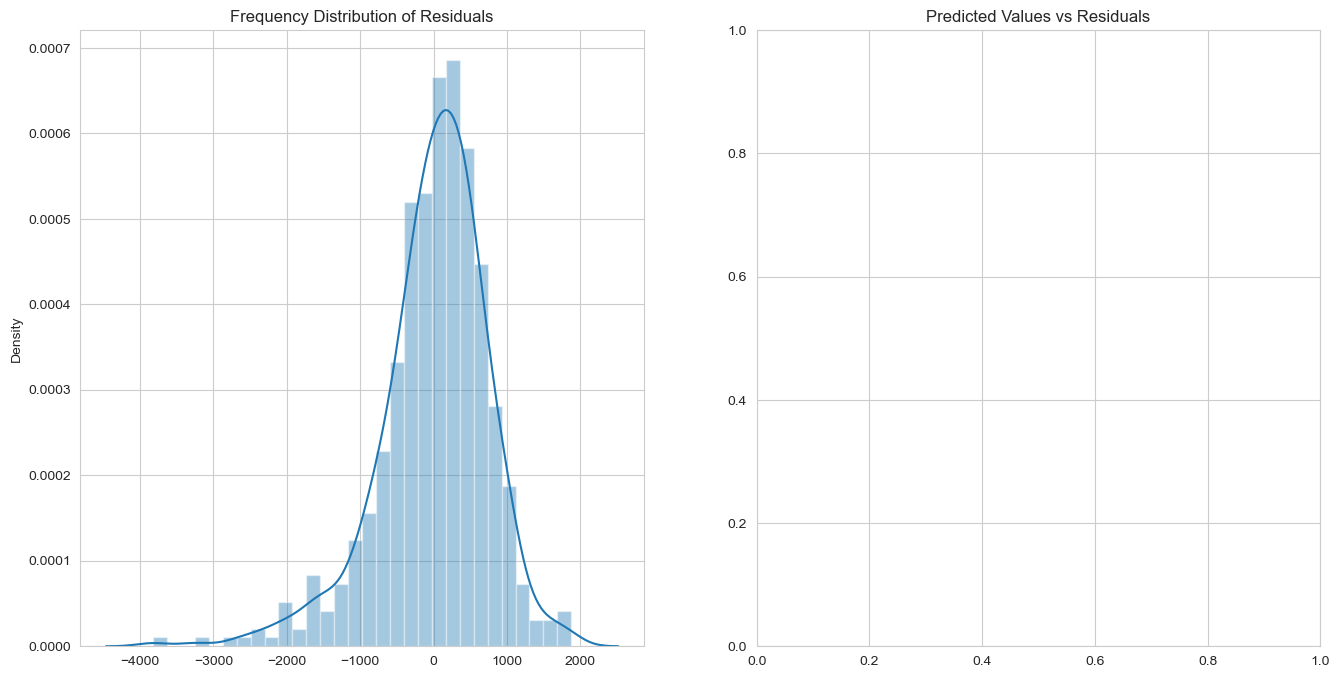

In [46]:
X_train_sm = sm.add_constant(X_train[selected_features])

y_train_pred = final_model.predict(X_train_sm)
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_train-y_train_pred, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')
\
sns.regplot(y_train_pred,y_train-y_train_pred,ax=ax[1])
plt.show()

In [47]:
(y_train-y_train_pred).mean()

-6.801438639345377e-12

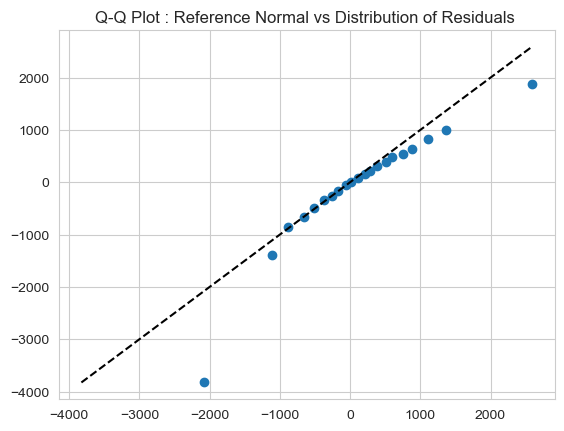

In [48]:
mean = (y_train-y_train_pred).mean()
std = (y_train-y_train_pred).std()

ref_normal = np.random.normal(mean,std,(y_train-y_train_pred).shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train - y_train_pred , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

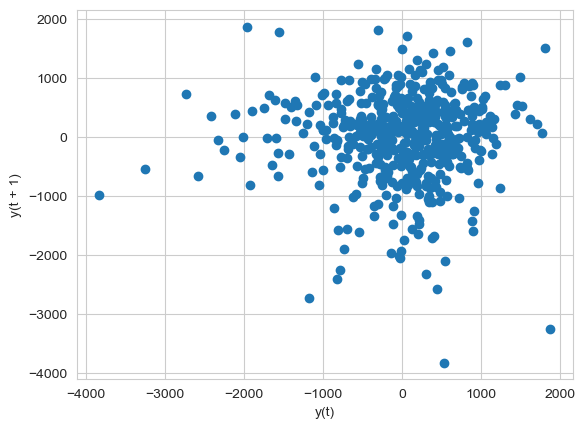

In [49]:
from pandas.plotting import lag_plot
lag_plot(y_train-y_train_pred)

In [50]:
y_test = dtest.pop('cnt')
X_test = dtest
X_test[num_vars] = numerical_scaler.transform(X_test[num_vars])
X_test = X_test[selected_features]

In [51]:
X_test = sm.add_constant(X_test)
y_test_pred = final_model.predict(X_test)

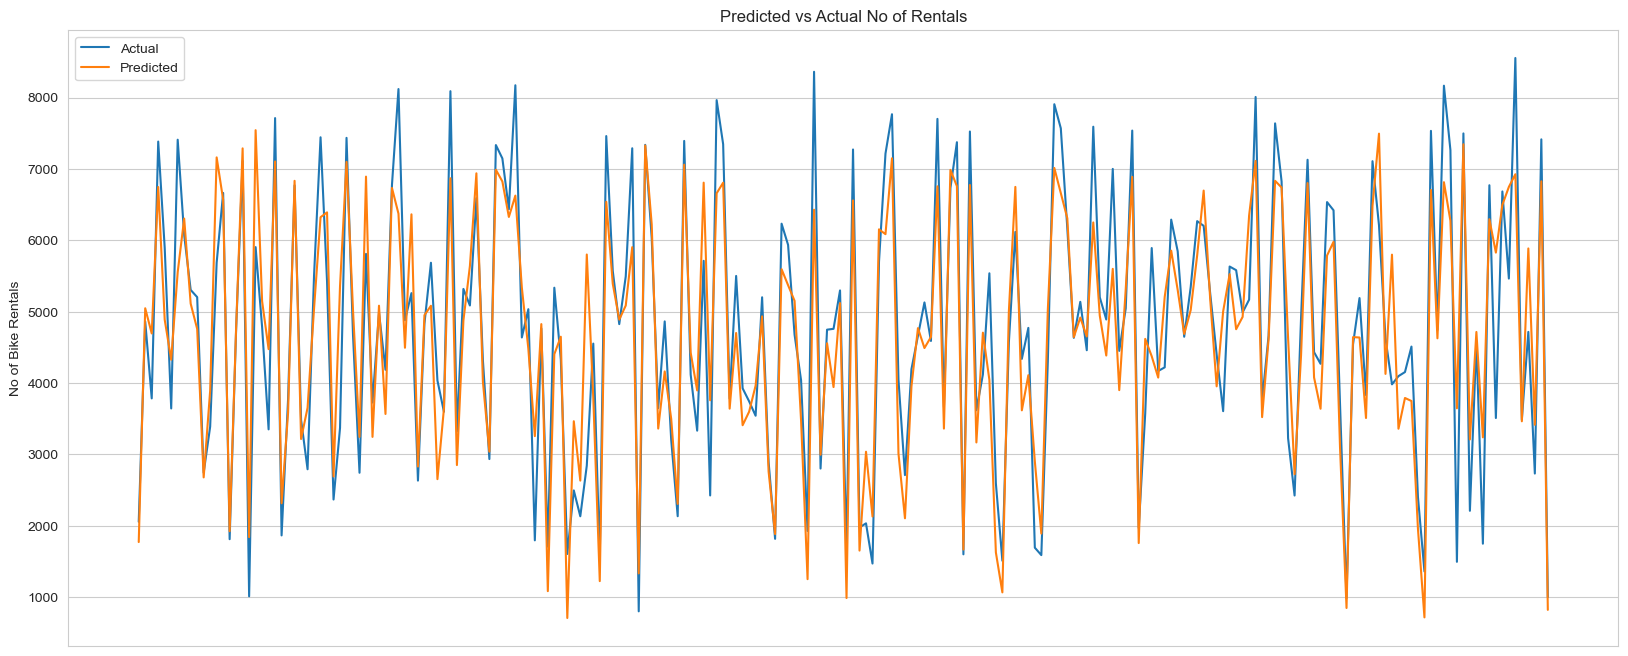

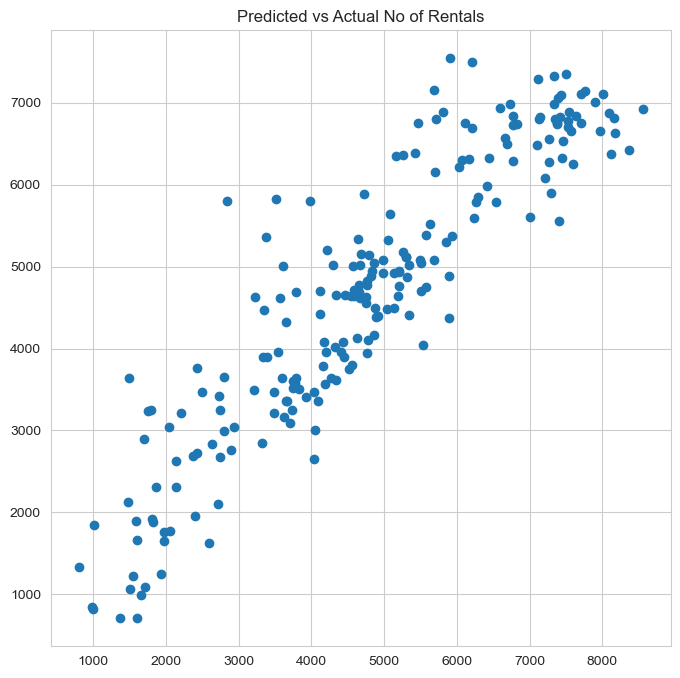

In [52]:
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

plt.figure(figsize=[8,8])
plt.scatter(y_test,y_test_pred);
plt.title('Predicted vs Actual No of Rentals');

In [53]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.85
R-squared for test data: 0.82
Mean Squared Error 631443.086


In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
clr = cross_val_score(lr,X_train[selected_features],y_train,cv=10, scoring='r2')
clr

array([0.8072688 , 0.89700598, 0.76381301, 0.9113238 , 0.85019654,
       0.87838919, 0.85582607, 0.73317019, 0.72332405, 0.87100234])

In [55]:
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))

R-square at 0.95 confidence level : 0.83 (+/- 0.13)


In [56]:
selected_features

array(['yr', 'october', 'september', 'july', 'cloudy', 'may', 'march',
       'winter', 'light snow/rain', 'summer', 'windspeed', 'hum', 'temp',
       'fall'], dtype=object)

In [57]:
from sklearn.preprocessing import StandardScaler
reg_features = selected_features
scaler = StandardScaler()
data = X_train[selected_features]
std_num = scaler.fit(data[['temp','windspeed','hum']])


std_X_train = pd.DataFrame(data = scaler.transform(data[['temp','windspeed','hum']]), columns=['temp','windspeed','hum'])
for i in reg_features : 
    std_X_train[i] = data[i].values


reshaped_y_train = y_train.values.reshape(-1,1)

std_model = lr.fit(std_X_train, reshaped_y_train)
result = pd.DataFrame(data = std_model.coef_, columns = std_X_train.columns, index=['MLR Coefficients']).T
result = result.sort_values(by='MLR Coefficients',ascending=False)
print('\nIntercept :',std_model.intercept_)
result


Intercept : [1537.72228946]


,MLR Coefficients
temp,4082.936575
yr,1957.991695
winter,1397.331374
summer,1148.657974
fall,1045.673866
october,617.356884
september,606.832643
march,429.794270
may,378.932190
cloudy,-374.732495
